Author: Tony Malayil

Date: July 12, 2024

CAP 4613 - 001

In [1]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = np.arange(10)
print(x_train.shape)

split = int(0.2*x_train.shape[0])

num_train_img = np.arange(0, x_train.shape[0])
train_ind = np.random.permutation(num_train_img)

x_train = x_train[train_ind,:,:]
y_train = y_train[train_ind]

split = int(0.2*x_train.shape[0])

x_valid = x_train[0:split,:,:]
y_valid = y_train[0:split]

print("\nX_valid has a size of", x_valid.shape[0], "images, while Y_valid has a size of", y_valid.shape[0])

x_train = x_train[split:,:,:]
y_train = y_train[split:]
print("X_train size is", x_train.shape[0])
print("Y_train size is", y_train.shape[0])

#Scaling image
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_valid /= 255
x_test /= 255

#Convert labels to binary matrices
y_train_c = to_categorical(y_train, num_classes = len(classes))
y_valid_c = to_categorical(y_valid, num_classes = len(classes))
y_test_c = to_categorical(y_test, num_classes = len(classes))


170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)

X_valid has a size of 10000 images, while Y_valid has a size of 10000
X_train size is 40000
Y_train size is 40000


d. Using Keras library, build a CNN with the following design: 2 convolutional blocks, 1 flattening layer,1 FC layer with 512 nodes, and 1output layer. Each convolutional block consists of two back-to-back Conv layers followed by max pooling. The filter size is 3x3x image_depth. The number of filters is 32 in the first convolutional block and 64 in the second block. Use the following network architecture as a reference:


In [2]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt


model_a = Sequential()
model_a.add(Conv2D(32, (3,3), padding = 'same', input_shape = x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3,3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size = (2,2)))

model_a.add(Conv2D(64, (3,3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3,3)))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size = (2,2)))

model_a.add(Flatten())
model_a.add(Dense(units = 512, activation = 'relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units = len(classes), activation = 'softmax'))
model_a.summary()

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_a.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

#Checkpoint
save_path = 'content/drive/My Drive/model_a_cifar10.h5'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only = True, save_freq = 'epoch')

history = model_a.fit(x_train, y_train_c, batch_size = 32, epochs = 50, verbose = 1, validation_data = (x_valid, y_valid_c), callbacks = [callbacks_save])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 7s 6ms/step - loss: 1.1080 - accuracy: 0.6085 - val_loss: 0.9243 - val_accuracy: 0.6758
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9111 - accuracy: 0.6777 - val_loss: 0.8297 - val_accuracy: 0.7124
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7886 - accuracy: 0.7223 - val_loss: 0.8260 - val_accuracy: 0.7151
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6984 - accuracy: 0.7558 - val_loss: 0.8300 - val_accuracy: 0.7097
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6224 - accuracy: 0.7836 - val_loss: 0.7548 - val_accuracy: 0.7462
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5549 - accuracy: 0.8030 - val_loss: 0.7858 - val_accuracy: 0.7442
Epoch 8/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5013 - accuracy: 0.8235 - val_loss: 0.7770 - val_accuracy: 0.7489
Epo

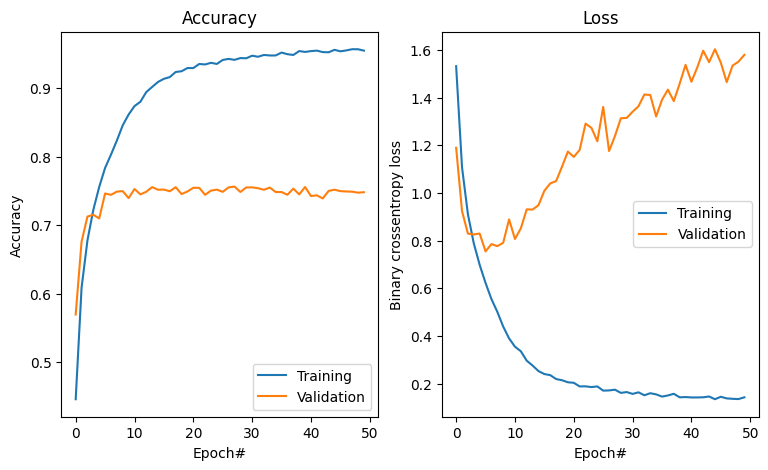

1250/1250 [==============================] - 4s 3ms/step - loss: 0.4372 - accuracy: 0.8565
Total loss on training set:  0.4372352063655853
Accuracy of training set:  0.8565000295639038
313/313 [==============================] - 1s 3ms/step - loss: 0.7548 - accuracy: 0.7462
Total loss on validation set:  0.7548038363456726
Accuracy of validation set:  0.7462000250816345


In [3]:
def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1, 2, 1)
  plt.plot(epochs, accuracy_train, epochs, accuracy_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Training', 'Validation'])

  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss_train, epochs, loss_val)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Loss')
  plt.legend(['Training', 'Validation'])
  plt.show()

plt.figure(figsize = [9, 5])
acc_curve_training = np.array(history.history['accuracy'])
loss_curve_training = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_training, loss_curve_training, acc_curve_val, loss_curve_val)

model_a = load_model(save_path)

score = model_a.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_a.evaluate(x_valid, y_valid_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])


d. Now define another model with the same architecture in (d) and then:

    i. Compile the network. Make sure to select a correct loss function for this classification problem. Use Adam optimizer (Adam, learning rate of 0.001).

    ii. Use ModelCheckpoint to save the best model based on the lowest validation loss.

    iii. Create an image data generator in Keras for real-time data augmentation. The augmentation operations are rotation (10 degrees range), width and height shift (0.1 range), and horizontal flip.

    iv. Train the network for 50 epochs with a batch size of 32. Remember to use the image data generator. Assign the validation set to validation_data in the fit function.

    v. Plot the training and validation loss for all the epochs in one plot.

    vi. Use the evaluate() Keras function to find the training and validation loss and the accuracy. Report the results.


In [4]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

model_b = Sequential()
model_b.add(Conv2D(32, (3,3), padding = 'same', input_shape = x_train.shape[1:]))
model_b.add(Activation('relu'))
model_b.add(Conv2D(32, (3,3)))
model_b.add(Activation('relu'))
model_b.add(MaxPooling2D(pool_size = (2,2)))

model_b.add(Conv2D(64, (3,3), padding = 'same'))
model_b.add(Activation('relu'))
model_b.add(Conv2D(64, (3,3)))
model_b.add(Activation('relu'))
model_b.add(MaxPooling2D(pool_size = (2,2)))

model_b.add(Flatten())
model_b.add(Dense(units = 512, activation = 'relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(units = len(classes), activation = 'softmax'))
model_b.summary()

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_b.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

#Data augmentation
datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
datagen.fit(x_train)

#Checkpoint
save_path = 'content/drive/My Drive/model_b_cifar10.h5'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only = True, save_freq = 'epoch')

history = model_b.fit(datagen.flow(x_train, y_train_c, 32),
                      steps_per_epoch = len(x_train) / 32,
                      epochs = 50, verbose = 1,
                      validation_data = (x_valid, y_valid_c), callbacks = [callbacks_save])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                      

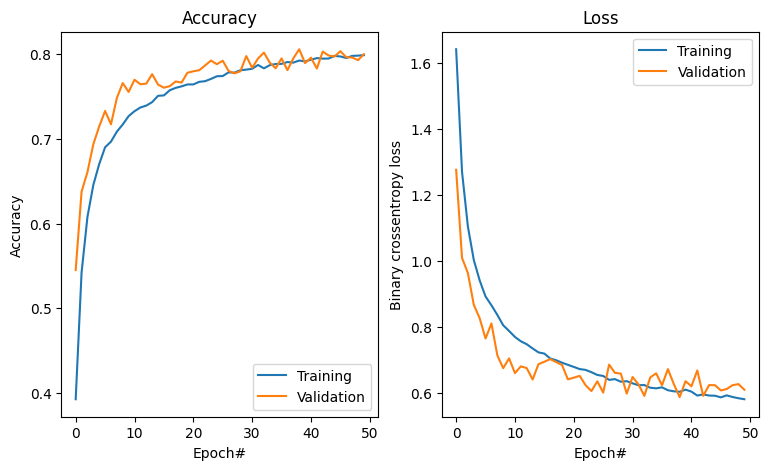

1250/1250 [==============================] - 4s 3ms/step - loss: 0.4099 - accuracy: 0.8568
Total loss on training set:  0.40986761450767517
Accuracy of training set:  0.8568000197410583
313/313 [==============================] - 1s 3ms/step - loss: 0.5863 - accuracy: 0.8061
Total loss on validation set:  0.5862736701965332
Accuracy of validation set:  0.8061000108718872


In [5]:
plt.figure(figsize = [9, 5])
acc_curve_training = np.array(history.history['accuracy'])
loss_curve_training = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_training, loss_curve_training, acc_curve_val, loss_curve_val)

model_b = load_model(save_path)

score = model_b.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_b.evaluate(x_valid, y_valid_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])


g. What do you observe from the validation loss in both step (e) and (f)? Is the model overfitting or underfitting the training data? Explain.

Model A (the first model) is overfitting to the training data. It has a high accuracy for the training data, around 90% by the 50th epoch, but lower validation accuracy and increasing validation loss after the 5th epoch.

Model B (second model) is neither overfitting or underfitting, as its validation accuracy is generally follows the training accuracy and well as the validation loss and training loss, both decreasing over epochs.

h. Now define another model with the same architecture in (d), except that this time you need to add batch normalization layers to the CNN network.

    i. Add normalization layer after all the convolutional and fully connected layers (not the output layer). Add them before the activation layers and be noted that there is no need for the bias in the convolutional or fully connected layers.

    ii. Compile the network. Make sure to select a correct loss function for this classification problem. Use Adam optimizer (Adam, learning rate of 0.01).

    iii. Use ModelCheckpoint to save the best model based on the lowest validation loss.

    iv. Train the network for 50 epochs with a batch size of 64. Remember to assign the validation set to validation_data in the fit function.

    v. Plot the training and validation loss for all the epochs in one plot.
    
    vi. Use the evaluate() Keras function to find the training and validation loss


In [6]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt

model_c = Sequential()
model_c.add(Conv2D(32, (3,3), padding = 'same', input_shape = x_train.shape[1:], use_bias = False))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(32, (3,3), padding = 'same', use_bias = False))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size = (2,2)))

model_c.add(Conv2D(64, (3,3), padding = 'same', use_bias = False))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(64, (3,3), padding = 'same', use_bias = False))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size = (2,2)))

model_c.add(Flatten())
model_c.add(Dense(units = 512))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(units = len(classes)))
model_c.add(BatchNormalization())
model_c.add(Activation('softmax'))
model_c.summary()

opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model_c.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

save_path = 'content/drive/My Drive/model_c_cifar10.h5'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only = True, save_freq = 'epoch')

history = model_c.fit(x_train, y_train_c, batch_size = 64, epochs = 50, verbose = 1, validation_data = (x_valid, y_valid_c), callbacks = [callbacks_save])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        864       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation_8 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9216      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)       

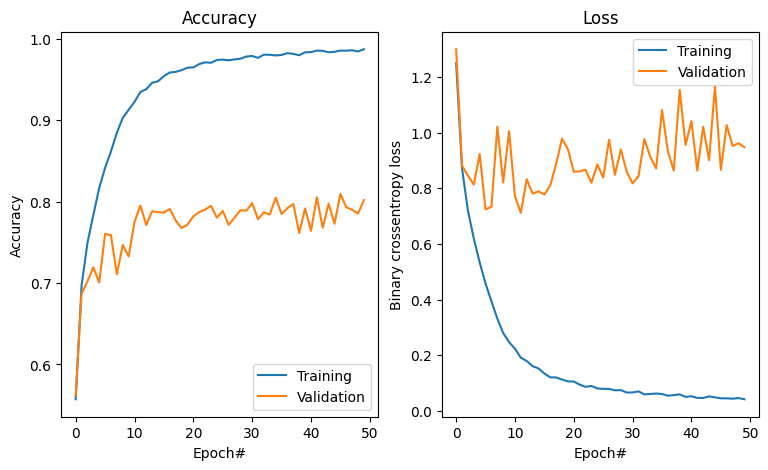

1250/1250 [==============================] - 4s 3ms/step - loss: 0.0578 - accuracy: 0.9857
Total loss on training set:  0.05784931778907776
Accuracy of training set:  0.9857000112533569
313/313 [==============================] - 1s 3ms/step - loss: 0.7120 - accuracy: 0.7951
Total loss on validation set:  0.7119760513305664
Accuracy of validation set:  0.7950999736785889


In [7]:
plt.figure(figsize = [9, 5])
acc_curve_training = np.array(history.history['accuracy'])
loss_curve_training = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_training, loss_curve_training, acc_curve_val, loss_curve_val)

model_c = load_model(save_path)

score = model_c.evaluate(x_train, y_train_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

score = model_c.evaluate(x_valid, y_valid_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

i. What do you observe from the training loss in both steps (e) and (h)? Explain.

The training loss in Model A ends up at around 0.2 by epoch 50, likewise the training loss for Model C is also pretty low, around 0.07. These values are  lower than that of Model B, showing that Model A and C become extremely accurate in the training data, resulting in low loss, but Model B has overall similar accuracy and lower loss between training and validation.